In [26]:
import numpy as np
import pandas as pd
coins = pd.read_csv('DMCoins.csv')

In [27]:
coinsEFine = coins[coins['Mint_State'] == 'EFine']
coinsEFine = coinsEFine[['Denom', 'Year', 'Value']]

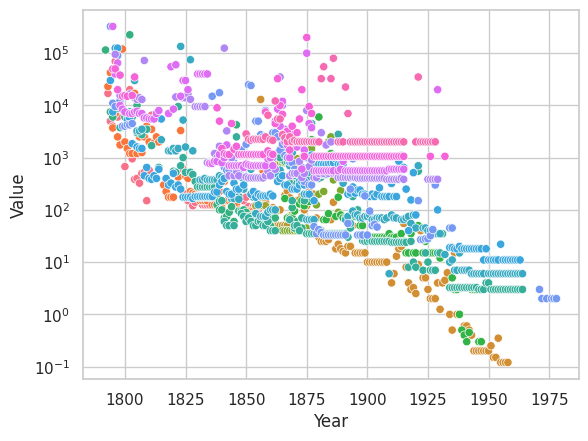

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsEFine, hue='Denom', legend=False)
plt.yscale('log')

In [29]:
import pandas as pd

df = pd.DataFrame(coinsEFine)

# Calculate IQR for the 'Value' column
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on IQR
outliers = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

# Print the rows containing outliers
print("Rows with outliers based on IQR:")
print(df[outliers])

Rows with outliers based on IQR:
             Denom  Year    Value
5         HalfCent  1793  17000.0
12        HalfCent  1794   5000.0
19        HalfCent  1795   4000.0
26        HalfCent  1796  70000.0
33        HalfCent  1797   6000.0
...            ...   ...      ...
9867   DoubleEagle  1885  32500.0
9873   DoubleEagle  1886  80000.0
9898   DoubleEagle  1891  22500.0
9904   DoubleEagle  1892   7000.0
10052  DoubleEagle  1921  35000.0

[179 rows x 3 columns]


In [30]:
indicies = df[outliers].index
indicies = np.array(indicies)
indicies

array([    5,    12,    19,    26,    33,    47,   110,   259,   266,
         272,   278,   296,   326,   356,   368,   447,   726,  2219,
        2937,  2946,  2955,  2964,  2973,  2982,  2991,  3000,  3007,
        3016,  3158,  3404,  3413,  3422,  3431,  3440,  3449,  3457,
        3465,  3472,  3489,  3529,  4639,  4649,  4658,  4667,  4676,
        4685,  4748,  4756,  4769,  5962,  5969,  5976,  5983,  5989,
        5996,  6079,  7255,  7263,  7271,  7279,  7287,  7294,  7301,
        7308,  7315,  7322,  7327,  7332,  7415,  7422,  7436,  7443,
        7464,  7486,  7494,  7922,  7927,  7932,  7937,  7942,  7947,
        7952,  7957,  7962,  7967,  7972,  7977,  7982,  7987,  7992,
        7997,  8002,  8007,  8012,  8057,  8061,  8174,  8180,  8186,
        8240,  8276,  8525,  8531,  8537,  8543,  8549,  8555,  8561,
        8567,  8573,  8579,  8585,  8591,  8597,  8603,  8609,  8615,
        8621,  8627,  8633,  8639,  8643,  8649,  8655,  8662,  8668,
        8674,  8680,

In [31]:
for i in indicies:
  coinsEFine = coinsEFine.drop(i)

In [32]:
coinsEFine

,Denom,Year,Value
40,HalfCent,1800,675.0
53,HalfCent,1803,950.0
60,HalfCent,1804,385.0
67,HalfCent,1805,400.0
74,HalfCent,1806,325.0
...,...,...,...
10067,DoubleEagle,1924,2005.0
10072,DoubleEagle,1925,2005.0
10077,DoubleEagle,1926,2005.0
10082,DoubleEagle,1927,2005.0


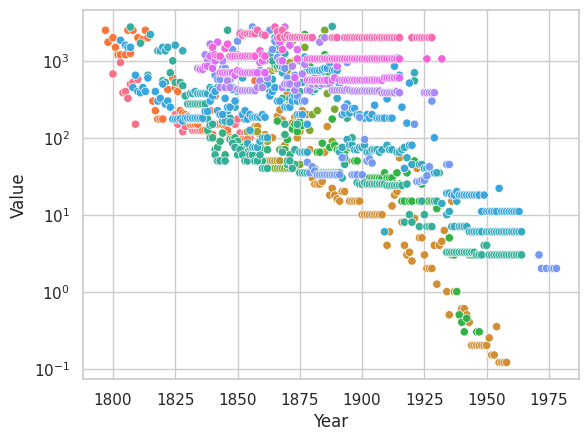

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsEFine, hue='Denom', legend=False)
plt.yscale('log')

In [34]:
from sklearn.preprocessing import LabelEncoder
lencDenom = LabelEncoder()
coinsEFine["Denom"] = lencDenom.fit_transform(coinsEFine["Denom"])
coinsEFine["Denom"]

40       4
53       4
60       4
67       4
74       4
        ..
10067    2
10072    2
10077    2
10082    2
10087    2
Name: Denom, Length: 1140, dtype: int64

In [35]:
coinsEFine['log_Value'] = np.log(coinsEFine['Value'])

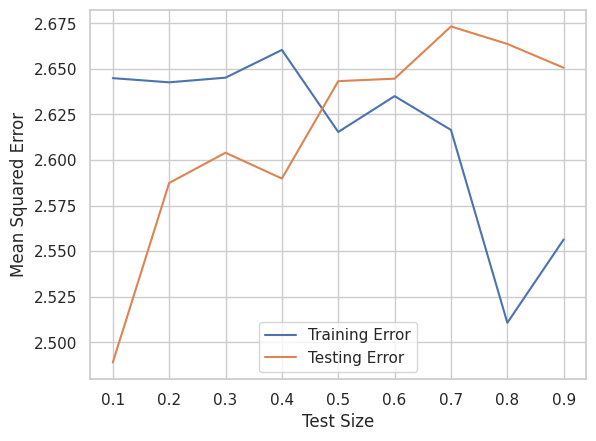

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = coinsEFine.iloc[:,0:2]
y = coinsEFine.log_Value

# Create a linear regression model
model = LinearRegression()

# Choose a range of test sizes
test_sizes = np.linspace(0.1, 0.9, 9)

# Lists to store training and testing errors for each test size
train_errors = []
test_errors = []

for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting the errors
plt.plot(test_sizes, train_errors, label='Training Error')
plt.plot(test_sizes, test_errors, label='Testing Error')
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
X = coinsEFine.iloc[:,0:2]
Y = coinsEFine.log_Value

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state=0)

In [38]:
X

,Denom,Year
40,4,1800
53,4,1803
60,4,1804
67,4,1805
74,4,1806
...,...,...
10067,2,1924
10072,2,1925
10077,2,1926
10082,2,1927


In [39]:
# Use the Linear Regression Model
from sklearn.linear_model import LinearRegression

# Define a linear regression model
reg = LinearRegression()

# Train and fit the training data
reg.fit(x_train , y_train)

# We will measure how well our linear regression works in our x_test split
# predictions are the estimations
log_predictions = reg.predict(x_test)
predictions = np.exp(log_predictions)

In [40]:
from sklearn.metrics import mean_squared_error

# To compare models
mseModel1 = mean_squared_error(y_test, predictions)

In [41]:
mseModel1

203865.039400756

In [42]:
coefficients = reg.coef_
intercept = reg.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

Coefficients: [-0.04162376 -0.03375044]
Intercept: 68.65736393181555


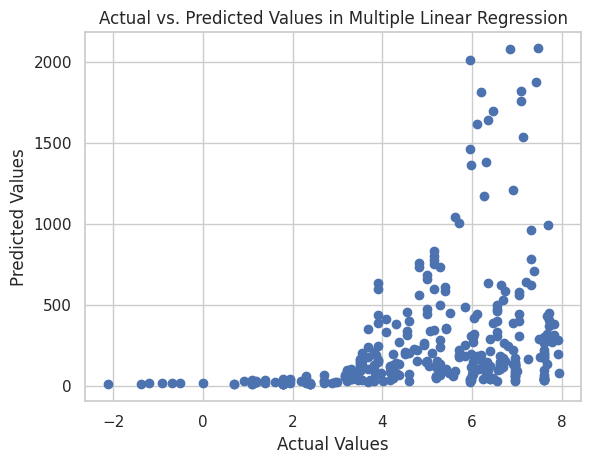

In [43]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values in Multiple Linear Regression')
plt.show()

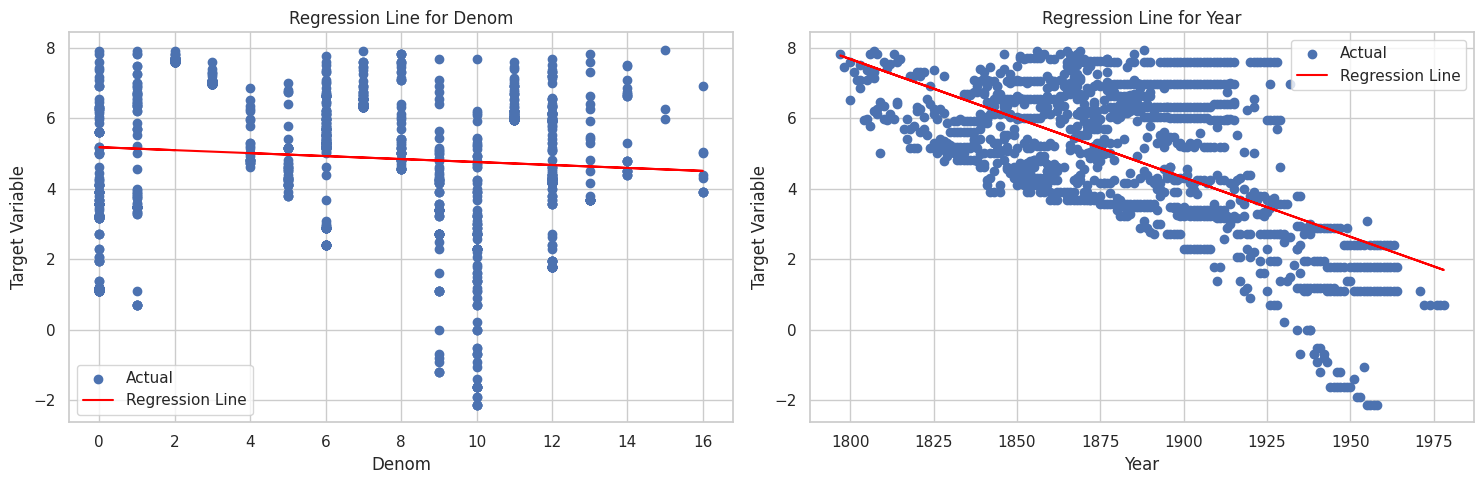

In [44]:
# Create subplots for each independent variable
fig, axs = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(15, 5))

# Iterate through each independent variable
for i, col in enumerate(X.columns):
    # Extract the independent variable
    x_values = X[col].values.reshape(-1, 1)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(x_values, Y)

    # Predict the target variable based on the independent variable
    y_pred = model.predict(x_values)

    # Plot the regression line
    axs[i].scatter(x_values, Y, label='Actual')
    axs[i].plot(x_values, y_pred, color='red', label='Regression Line')
    axs[i].set_title(f'Regression Line for {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Target Variable')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [45]:
coinsEFine[coinsEFine['Denom'] == 7]

,Denom,Year,Value,log_Value
8723,7,1835,775.0,6.652863
8728,7,1836,775.0,6.652863
8733,7,1837,850.0,6.745236
8738,7,1838,850.0,6.745236
8743,7,1839,1150.0,7.047517
...,...,...,...,...
9150,7,1911,600.0,6.396930
9156,7,1912,600.0,6.396930
9162,7,1913,600.0,6.396930
9168,7,1914,600.0,6.396930


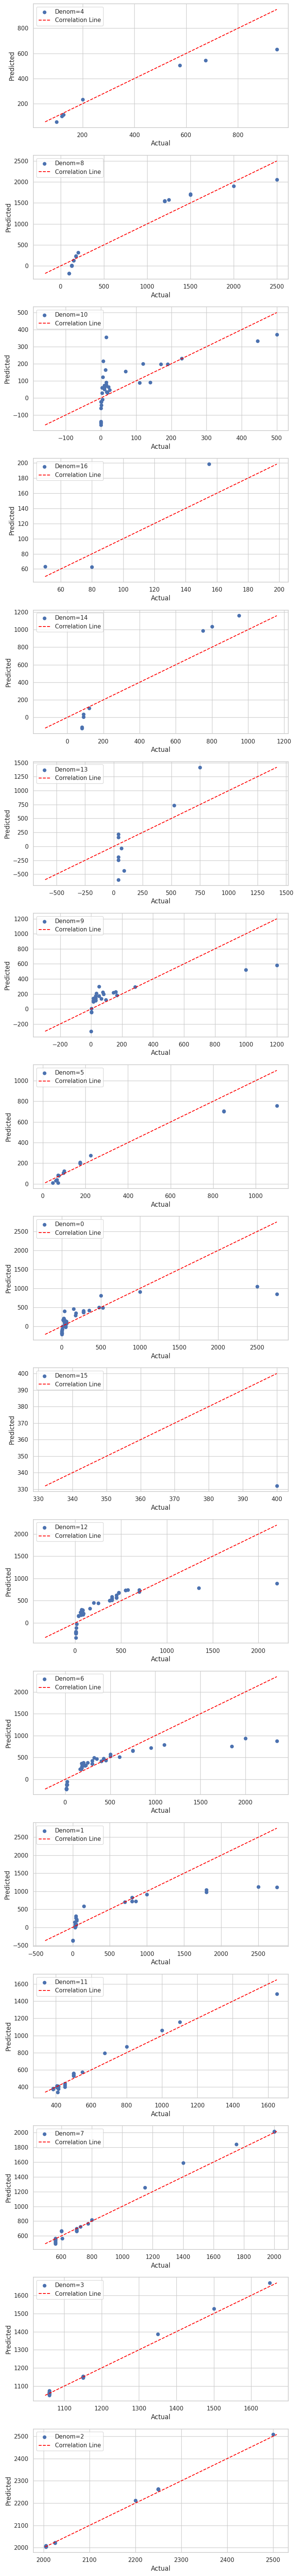

In [46]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
attributes = coinsEFine.drop(['Value'], axis=1)  # All columns except the target variable
target_variable = coinsEFine['Value']  # Specify the column name of your target variable
categorical_attribute = 'Denom'  # Specify the column name of your categorical attribute

# Get unique values of the categorical attribute
unique_values = coinsEFine[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows))

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsEFine[coinsEFine[categorical_attribute] == value]

    # Extract attributes and target variable for the subset
    subset_attributes = subset_data.drop(['Value'], axis=1)
    subset_target = subset_data['Value']

    if len(subset_data) > 1:
      # Split the subset into training and testing sets
      subset_attributes_train, subset_attributes_test, subset_target_train, subset_target_test = train_test_split(
          subset_attributes, subset_target, test_size=0.33, random_state=42
      )

      # Create a linear regression model
      model = LinearRegression()

      # Train the model on the training data subset
      model.fit(subset_attributes_train, subset_target_train)

      # Make predictions on the test data subset
      predictions = model.predict(subset_attributes_test)

      # Plot actual vs. predicted for the current category
      axes[i].scatter(subset_target_test, predictions, label=f'{categorical_attribute}={value}')
      axes[i].set_xlabel('Actual')
      axes[i].set_ylabel('Predicted')
      axes[i].legend()

      # Plot the correlation line
      min_val = min(subset_target_test.min(), predictions.min())
      max_val = max(subset_target_test.max(), predictions.max())
      correlation_line = [min_val, max_val]
      axes[i].plot(correlation_line, correlation_line, linestyle='--', color='red', label='Correlation Line')
      axes[i].legend()
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

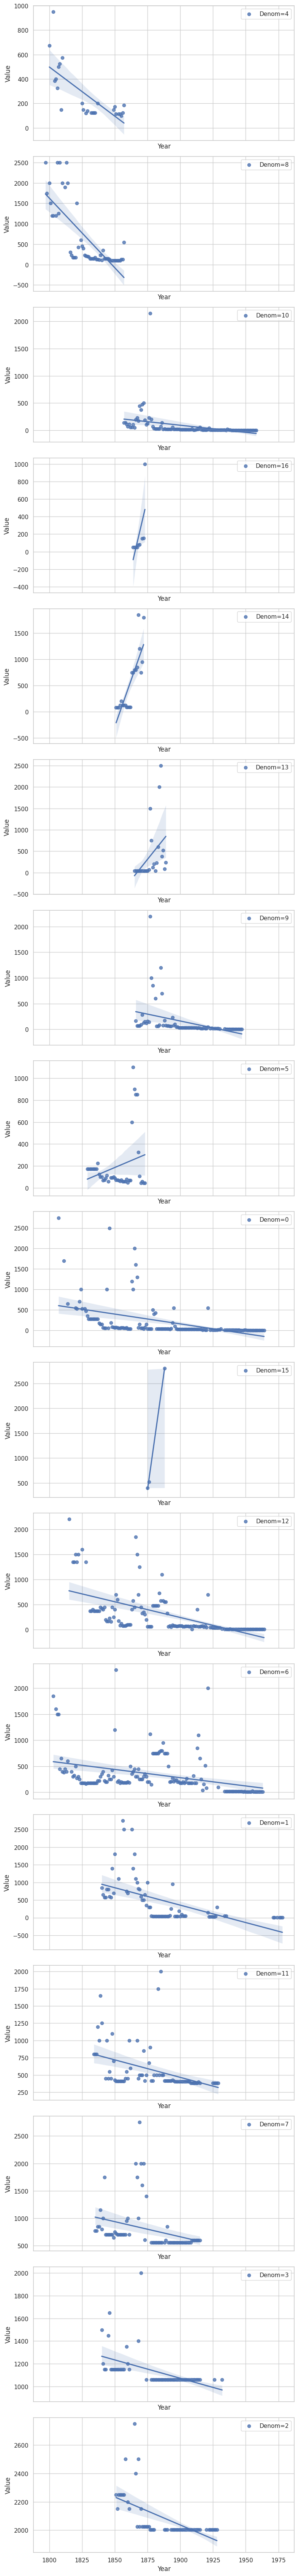

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Denom'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Get unique values of the categorical attribute
unique_values = coinsEFine[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows), sharex=True)

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsEFine[coinsEFine[categorical_attribute] == value]

    # Plot a scatter plot with a regression line
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], ax=axes[i], label=f'{categorical_attribute}={value}')

    # Set plot labels and title
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(target_variable)
    axes[i].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


           Denom      Year     Value  log_Value
Denom        NaN       NaN       NaN        NaN
Year         NaN  1.000000 -0.732164  -0.796241
Value        NaN -0.732164  1.000000   0.963750
log_Value    NaN -0.796241  0.963750   1.000000
           Denom      Year     Value  log_Value
Denom        NaN       NaN       NaN        NaN
Year         NaN  1.000000 -0.761498  -0.837523
Value        NaN -0.761498  1.000000   0.947945
log_Value    NaN -0.837523  0.947945   1.000000
           Denom      Year     Value  log_Value
Denom        NaN       NaN       NaN        NaN
Year         NaN  1.000000 -0.337454  -0.923373
Value        NaN -0.337454  1.000000   0.487149
log_Value    NaN -0.923373  0.487149   1.000000
           Denom      Year     Value  log_Value
Denom        NaN       NaN       NaN        NaN
Year         NaN  1.000000  0.652616   0.855047
Value        NaN  0.652616  1.000000   0.939794
log_Value    NaN  0.855047  0.939794   1.000000
           Denom      Year     Value  lo

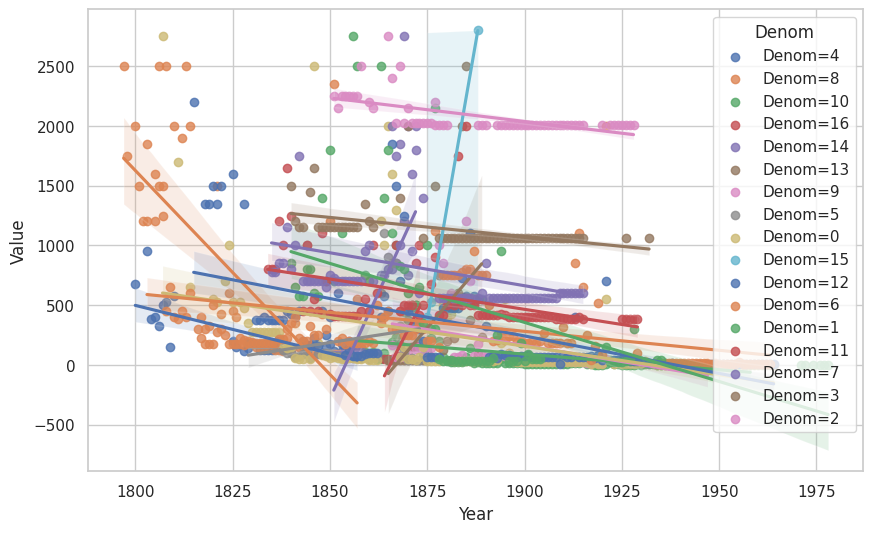

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Denom'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsEFine[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsEFine[coinsEFine[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

    print(subset_data.corr())

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()

In [49]:
overall_correlation_matrix = coinsEFine.corr()
overall_correlation_matrix

,Denom,Year,Value,log_Value
Denom,1.000000,0.017151,-0.187726,-0.087943
Year,0.017151,1.000000,-0.290346,-0.619472
Value,-0.187726,-0.290346,1.000000,0.738478
log_Value,-0.087943,-0.619472,0.738478,1.000000


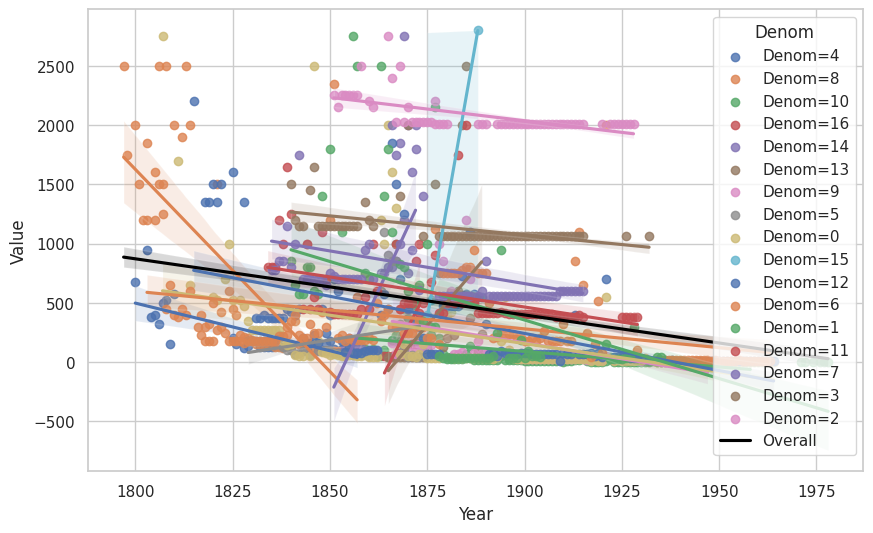

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Denom'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable
attribute_column = 'Year'  # Specify the column name of the attribute of interest

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsEFine[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsEFine[coinsEFine[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data[attribute_column], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

# Plot overall regression line
sns.regplot(x=coinsEFine[attribute_column], y=coinsEFine[target_variable], scatter=False, color='black', label='Overall')

# Set plot labels and title
plt.xlabel(attribute_column)
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()